In [1]:
# Input data

import scipy.io as spio
import numpy as np

# Reading the data for the Face from all the subjects
BahramFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/BahramFlipp.mat')
DJFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/DJFlipp.mat')
NickFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/NickFlipp.mat')
RoohiFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/RoohiFlipp.mat')
SarahFlipp = spio.loadmat(file_name='../data/bci-project-data-RAW/SarahFlipp.mat')

# Deviding the input data into train and test
# For creating the training and testing set, 
# 30% percent of each subject is considered as test and
# 70% of each subject is conidered as training.
length = int(BahramFlipp['Intensification_Data'].shape[0] * 0.30)
# length

FlippsDataAll = np.vstack(tup=(BahramFlipp['Intensification_Data'][:], 
                       DJFlipp['Intensification_Data'][:], 
                       NickFlipp['Intensification_Data'][:],
                      RoohiFlipp['Intensification_Data'][:],
                      SarahFlipp['Intensification_Data'][:]))

FlippsDataTrainAll = np.vstack(tup=(BahramFlipp['Intensification_Data'][:-length], 
                       DJFlipp['Intensification_Data'][:-length], 
                       NickFlipp['Intensification_Data'][:-length],
                      RoohiFlipp['Intensification_Data'][:-length],
                      SarahFlipp['Intensification_Data'][:-length]))

FlippsDataTest = np.vstack(tup=(BahramFlipp['Intensification_Data'][-length:], 
                       DJFlipp['Intensification_Data'][-length:], 
                       NickFlipp['Intensification_Data'][-length:],
                      RoohiFlipp['Intensification_Data'][-length:],
                      SarahFlipp['Intensification_Data'][-length:]))

print(FlippsDataAll.shape, FlippsDataAll.dtype,
 FlippsDataTest.shape, FlippsDataTest.dtype, 
 FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype)

BahramFlippDataTrain = BahramFlipp['Intensification_Data'][:-length]
DJFlippDataTrain = DJFlipp['Intensification_Data'][:-length]
NickFlippDataTrain = NickFlipp['Intensification_Data'][:-length]
RoohiFlippDataTrain = RoohiFlipp['Intensification_Data'][:-length]
SarahFlippDataTrain = SarahFlipp['Intensification_Data'][:-length]

# 30% of the training is validation.
# This is applied to every single subject data.
length2 = int(BahramFlippDataTrain.shape[0] * 0.30)
# length2

FlippsDataTrain = np.vstack(tup=(BahramFlippDataTrain[:-length2], 
                       DJFlippDataTrain[:-length2], 
                       NickFlippDataTrain[:-length2],
                      RoohiFlippDataTrain[:-length2],
                      SarahFlippDataTrain[:-length2]))

FlippsDataValid = np.vstack(tup=(BahramFlippDataTrain[-length2:], 
                       DJFlippDataTrain[-length2:],
                       NickFlippDataTrain[-length2:],
                      RoohiFlippDataTrain[-length2:],
                      SarahFlippDataTrain[-length2:]))

print(FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype, 
 FlippsDataTrain.shape, FlippsDataTrain.dtype, 
 FlippsDataValid.shape, FlippsDataValid.dtype)

FlippsLabelAll = np.vstack(tup=(BahramFlipp['Intensification_Label'][:], 
                       DJFlipp['Intensification_Label'][:], 
                       NickFlipp['Intensification_Label'][:],
                      RoohiFlipp['Intensification_Label'][:],
                      SarahFlipp['Intensification_Label'][:]))

FlippsLabelTrainAll = np.vstack(tup=(BahramFlipp['Intensification_Label'][:-length], 
                       DJFlipp['Intensification_Label'][:-length], 
                       NickFlipp['Intensification_Label'][:-length],
                      RoohiFlipp['Intensification_Label'][:-length],
                      SarahFlipp['Intensification_Label'][:-length]))

FlippsLabelTest = np.vstack(tup=(BahramFlipp['Intensification_Label'][-length:], 
                       DJFlipp['Intensification_Label'][-length:], 
                       NickFlipp['Intensification_Label'][-length:],
                      RoohiFlipp['Intensification_Label'][-length:],
                      SarahFlipp['Intensification_Label'][-length:]))

print(FlippsLabelAll.shape, FlippsLabelAll.dtype,
 FlippsLabelTest.shape, FlippsLabelTest.dtype, 
 FlippsDataTrainAll.shape, FlippsDataTrainAll.dtype)

BahramFlippLabelTrain = BahramFlipp['Intensification_Label'][:-length]
DJFlippLabelTrain = DJFlipp['Intensification_Label'][:-length]
NickFlippLabelTrain = NickFlipp['Intensification_Label'][:-length]
RoohiFlippLabelTrain = RoohiFlipp['Intensification_Label'][:-length]
SarahFlippLabelTrain = SarahFlipp['Intensification_Label'][:-length]

FlippsLabelTrain = np.vstack(tup=(BahramFlippLabelTrain[:-length2], 
                       DJFlippLabelTrain[:-length2], 
                       NickFlippLabelTrain[:-length2],
                      RoohiFlippLabelTrain[:-length2],
                      SarahFlippLabelTrain[:-length2]))

FlippsLabelValid = np.vstack(tup=(BahramFlippLabelTrain[-length2:], 
                       DJFlippLabelTrain[-length2:], 
                       NickFlippLabelTrain[-length2:],
                      RoohiFlippLabelTrain[-length2:],
                      SarahFlippLabelTrain[-length2:]))

# # Normalizing input data
# def normalize(inputs, inputs_all):
#     return (inputs - inputs_all.mean(axis=0)[None,:,:]) / inputs_all.std(axis=0)[None,:,:]
# Yalda suggested this normalization.
def normalize(inputs):
    return (inputs - inputs.mean(axis=0)[None,:,:]) / inputs.std(axis=0)[None,:,:]

# onehot vectorizing output labels
def one_hot(labels, n_class):
    """ One-hot encoding """
    expansion = np.eye(n_class)
    y = expansion[:, labels-1].T
    assert y.shape[1] == n_class, "Wrong number of labels!"

    return y

# get minibatches for learning
def get_batches(X, y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], y[b:b+batch_size]

# Standardize/normalize train and test
# X_train_norm_all = normalize(inputs=FacesDataTrain, inputs_all=FacesDataAll)
X_train_norm = normalize(inputs=FlippsDataTrain)
X_valid_norm = normalize(inputs=FlippsDataValid)
X_test_norm = normalize(inputs=FlippsDataTest)

print(X_train_norm.shape, X_train_norm.dtype, 
X_valid_norm.shape, X_valid_norm.dtype,
X_test_norm.shape, X_test_norm.dtype)

### Hyperparameters

# Input data
batch_size = X_train_norm.shape[0]// 100 # minibatch size & number of minibatches
seq_len = X_train_norm.shape[1] # Number of steps: each trial length
n_channels = X_train_norm.shape[2] # number of channels in each trial

# Output labels
n_classes = int(FlippsLabelAll.max() + 1)

# Tweekable parameters
learning_rate = 0.001 #1e-3
epochs = 10 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

Y_train = np.array(FlippsLabelTrain, dtype=int).reshape(-1)
Y_valid = np.array(FlippsLabelValid, dtype=int).reshape(-1)
Y_test = np.array(FlippsLabelTest, dtype=int).reshape(-1)

Y_train_onehot = one_hot(labels=Y_train, n_class=n_classes)
Y_valid_onehot = one_hot(labels=Y_valid, n_class=n_classes)
Y_test_onehot = one_hot(labels=Y_test, n_class=n_classes)

print(Y_train_onehot.shape, Y_valid_onehot.shape, Y_test_onehot.shape, 
 X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

print(Y_train_onehot.dtype, Y_valid_onehot.dtype, Y_test_onehot.dtype,
 X_train_norm.dtype, X_valid_norm.dtype, X_test_norm.dtype)

# GPUs or CPU

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

#  No graphs is needed on tensorflow
inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs_')
labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels_')
keep_prob_ = tf.placeholder(tf.float32, name = 'keep_prob_')
learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate_')

(18900, 205, 16) float64 (5670, 205, 16) float64 (13230, 205, 16) float64
(13230, 205, 16) float64 (9265, 205, 16) float64 (3965, 205, 16) float64
(18900, 1) uint8 (5670, 1) uint8 (13230, 205, 16) float64
(9265, 205, 16) float64 (3965, 205, 16) float64 (5670, 205, 16) float64
(9265, 2) (3965, 2) (5670, 2) (9265, 205, 16) (3965, 205, 16) (5670, 205, 16)
float64 float64 float64 float64 float64 float64
TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


In [2]:
# Forward pass: Convolutional Layers, FC Layer, and Output layer
# (batch, 205, 16) --> (batch, 101, 32)
# (205 - 5 + 0)/2 + 1 = 100+1= 101
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = inputs_
out_conv = tf.layers.conv1d(inputs=in_conv, filters=32, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 101, 32) --> (batch, 49, 64)
# (101 - 5 + 0)/2 + 1 = (96/2)+1= 48+1= 49
# 2/5 with strides/kernel_size is 40% non-overlap/diff region and 60% overlapping window/ common region
in_conv = out_conv
out_conv = tf.layers.conv1d(inputs=in_conv, filters=64, kernel_size=5, strides=2, padding='valid')
out_conv = tf.layers.batch_normalization(inputs=out_conv)
out_conv = tf.nn.relu(features=out_conv)
out_conv = tf.nn.dropout(x=out_conv, keep_prob=keep_prob_)
print(out_conv.shape)

# (batch, 49, 64) --> (batch, 49*64) --> (batch, 49*64*2)
# 49*64 = 50*64 - 1*64 = 3200 - 64 = 3136, 3136*2 = 6272
# (batch, 49, 64) --> (batch, 3136) --> (batch, 6272)
in_fc = tf.reshape(tensor=out_conv, shape=(-1, 49*64))
out_fc = tf.layers.dense(inputs=in_fc, units=49*64*2)
out_fc = tf.layers.batch_normalization(inputs=out_fc)
out_fc = tf.nn.relu(features=out_fc)
out_fc = tf.nn.dropout(x=out_fc, keep_prob=keep_prob_)
print(in_fc.shape, out_fc.shape)

# (batch, 49*64*2) --> (batch, 2) 
logits = tf.layers.dense(inputs=out_fc, units=n_classes)
print(logits.shape)

(?, 101, 32)
(?, 49, 64)
(?, 3136) (?, 6272)
(?, 2)


In [3]:
# Backward pass: error backpropagation
# Cost function
cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost = tf.reduce_mean(input_tensor=cost_tensor)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [4]:
# Train the network
# Plotting the acc and loss curve
train_acc = []
train_loss = []

valid_acc = []
valid_loss = []

with tf.Session() as sess:
    # initalize session global variables just in the case they are initialized.
    sess.run(tf.global_variables_initializer())
    
    for e in range(epochs):
       
        # Loop over batches
        for x, y in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            # Feed dictionary
            feed = {inputs_:x, labels_:y, keep_prob_: keep_prob, learning_rate_:learning_rate}
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            
            train_acc.append(acc)
            train_loss.append(loss)
            
            ################################ Validation
            # Initialize 
            loss_v_batch, acc_v_batch = [], []

            # Loop over batches
            for x_v, y_v in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {inputs_:x_v, labels_:y_v, keep_prob_: 1.0}
                loss_v, acc_v = sess.run([cost, accuracy], feed_dict = feed)
                
                acc_v_batch.append(acc_v)
                loss_v_batch.append(loss_v)
                
            valid_acc.append(np.mean(acc_v_batch))
            valid_loss.append(np.mean(loss_v_batch))
            
            # Print info
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Train loss: {:6f}".format(loss),
                  "Valid loss: {:.6f}".format(np.mean(valid_loss)),
                  "Train acc: {:6f}".format(acc),
                  "Valid acc: {:.6f}".format(np.mean(valid_acc)))
            
    ################################ Test
    # Initialize 
    acc_batch, loss_batch = [], []

    # Loop over batches
    for x, y in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        feed = {inputs_:x, labels_:y, keep_prob_:1.0}
        loss, acc = sess.run([cost, accuracy], feed_dict = feed)

        acc_batch.append(acc)
        loss_batch.append(loss)

    # Print info
    print("Epoch: {}/{}".format(e+1, epochs),
          "Test loss: {:6f}".format(np.mean(loss_batch)),
          "Test acc: {:6f}".format(np.mean(acc_batch)))

Epoch: 1/10 Train loss: 0.737126 Valid loss: 6.092399 Train acc: 0.445652 Valid acc: 0.833165
Epoch: 1/10 Train loss: 5.586700 Valid loss: 5.809558 Train acc: 0.847826 Valid acc: 0.833165
Epoch: 1/10 Train loss: 5.997727 Valid loss: 5.036255 Train acc: 0.826087 Valid acc: 0.833165
Epoch: 1/10 Train loss: 3.952035 Valid loss: 4.230284 Train acc: 0.836957 Valid acc: 0.833165
Epoch: 1/10 Train loss: 2.224748 Valid loss: 3.547608 Train acc: 0.826087 Valid acc: 0.833165
Epoch: 1/10 Train loss: 1.089820 Valid loss: 3.035498 Train acc: 0.836957 Valid acc: 0.833165
Epoch: 1/10 Train loss: 0.558660 Valid loss: 2.687637 Train acc: 0.826087 Valid acc: 0.833093
Epoch: 1/10 Train loss: 0.460707 Valid loss: 2.445171 Train acc: 0.847826 Valid acc: 0.754676
Epoch: 1/10 Train loss: 0.652259 Valid loss: 2.259620 Train acc: 0.673913 Valid acc: 0.689698
Epoch: 1/10 Train loss: 0.722615 Valid loss: 2.108397 Train acc: 0.391304 Valid acc: 0.638296
Epoch: 1/10 Train loss: 0.701002 Valid loss: 1.981366 Train 

Epoch: 1/10 Train loss: 0.537835 Valid loss: 0.706209 Train acc: 0.836957 Valid acc: 0.803768
Epoch: 1/10 Train loss: 0.469006 Valid loss: 0.704891 Train acc: 0.826087 Valid acc: 0.804095
Epoch: 1/10 Train loss: 0.459931 Valid loss: 0.703641 Train acc: 0.836957 Valid acc: 0.804415
Epoch: 1/10 Train loss: 0.484923 Valid loss: 0.702439 Train acc: 0.826087 Valid acc: 0.804727
Epoch: 1/10 Train loss: 0.471208 Valid loss: 0.701263 Train acc: 0.836957 Valid acc: 0.805033
Epoch: 1/10 Train loss: 0.484423 Valid loss: 0.700096 Train acc: 0.836957 Valid acc: 0.805332
Epoch: 1/10 Train loss: 0.497389 Valid loss: 0.698927 Train acc: 0.826087 Valid acc: 0.805625
Epoch: 1/10 Train loss: 0.459629 Valid loss: 0.697743 Train acc: 0.836957 Valid acc: 0.805912
Epoch: 1/10 Train loss: 0.472749 Valid loss: 0.696530 Train acc: 0.836957 Valid acc: 0.806193
Epoch: 1/10 Train loss: 0.472522 Valid loss: 0.695282 Train acc: 0.836957 Valid acc: 0.806468
Epoch: 1/10 Train loss: 0.462148 Valid loss: 0.693998 Train 

Epoch: 2/10 Train loss: 0.400274 Valid loss: 0.598331 Train acc: 0.847826 Valid acc: 0.819270
Epoch: 2/10 Train loss: 0.436270 Valid loss: 0.597585 Train acc: 0.836957 Valid acc: 0.819387
Epoch: 2/10 Train loss: 0.405467 Valid loss: 0.596844 Train acc: 0.836957 Valid acc: 0.819502
Epoch: 2/10 Train loss: 0.469452 Valid loss: 0.596106 Train acc: 0.826087 Valid acc: 0.819616
Epoch: 2/10 Train loss: 0.458355 Valid loss: 0.595383 Train acc: 0.826087 Valid acc: 0.819732
Epoch: 2/10 Train loss: 0.446275 Valid loss: 0.594701 Train acc: 0.836957 Valid acc: 0.819852
Epoch: 2/10 Train loss: 0.434898 Valid loss: 0.594069 Train acc: 0.836957 Valid acc: 0.819977
Epoch: 2/10 Train loss: 0.466807 Valid loss: 0.593494 Train acc: 0.815217 Valid acc: 0.820119
Epoch: 2/10 Train loss: 0.422629 Valid loss: 0.592975 Train acc: 0.847826 Valid acc: 0.820255
Epoch: 2/10 Train loss: 0.409563 Valid loss: 0.592503 Train acc: 0.836957 Valid acc: 0.820386
Epoch: 2/10 Train loss: 0.421552 Valid loss: 0.592062 Train 

Epoch: 3/10 Train loss: 0.419182 Valid loss: 0.546790 Train acc: 0.836957 Valid acc: 0.827130
Epoch: 3/10 Train loss: 0.466152 Valid loss: 0.546307 Train acc: 0.782609 Valid acc: 0.827235
Epoch: 3/10 Train loss: 0.439205 Valid loss: 0.545844 Train acc: 0.847826 Valid acc: 0.827340
Epoch: 3/10 Train loss: 0.426119 Valid loss: 0.545404 Train acc: 0.815217 Valid acc: 0.827447
Epoch: 3/10 Train loss: 0.401754 Valid loss: 0.544987 Train acc: 0.858696 Valid acc: 0.827559
Epoch: 3/10 Train loss: 0.486959 Valid loss: 0.544596 Train acc: 0.836957 Valid acc: 0.827666
Epoch: 3/10 Train loss: 0.435834 Valid loss: 0.544231 Train acc: 0.815217 Valid acc: 0.827772
Epoch: 3/10 Train loss: 0.424736 Valid loss: 0.543882 Train acc: 0.826087 Valid acc: 0.827873
Epoch: 3/10 Train loss: 0.516240 Valid loss: 0.543558 Train acc: 0.815217 Valid acc: 0.827960
Epoch: 3/10 Train loss: 0.452441 Valid loss: 0.543257 Train acc: 0.858696 Valid acc: 0.828046
Epoch: 3/10 Train loss: 0.444182 Valid loss: 0.542974 Train 

Epoch: 4/10 Train loss: 0.355735 Valid loss: 0.519639 Train acc: 0.891304 Valid acc: 0.831577
Epoch: 4/10 Train loss: 0.367720 Valid loss: 0.519290 Train acc: 0.880435 Valid acc: 0.831637
Epoch: 4/10 Train loss: 0.308092 Valid loss: 0.518949 Train acc: 0.902174 Valid acc: 0.831694
Epoch: 4/10 Train loss: 0.293002 Valid loss: 0.518615 Train acc: 0.891304 Valid acc: 0.831741
Epoch: 4/10 Train loss: 0.376705 Valid loss: 0.518283 Train acc: 0.869565 Valid acc: 0.831786
Epoch: 4/10 Train loss: 0.394216 Valid loss: 0.517951 Train acc: 0.869565 Valid acc: 0.831835
Epoch: 4/10 Train loss: 0.331376 Valid loss: 0.517620 Train acc: 0.847826 Valid acc: 0.831881
Epoch: 4/10 Train loss: 0.362673 Valid loss: 0.517292 Train acc: 0.869565 Valid acc: 0.831926
Epoch: 4/10 Train loss: 0.429954 Valid loss: 0.516968 Train acc: 0.826087 Valid acc: 0.831971
Epoch: 4/10 Train loss: 0.431608 Valid loss: 0.516646 Train acc: 0.826087 Valid acc: 0.832020
Epoch: 4/10 Train loss: 0.483609 Valid loss: 0.516332 Train 

Epoch: 5/10 Train loss: 0.373846 Valid loss: 0.500110 Train acc: 0.836957 Valid acc: 0.835122
Epoch: 5/10 Train loss: 0.327680 Valid loss: 0.499913 Train acc: 0.869565 Valid acc: 0.835147
Epoch: 5/10 Train loss: 0.318023 Valid loss: 0.499717 Train acc: 0.869565 Valid acc: 0.835168
Epoch: 5/10 Train loss: 0.272920 Valid loss: 0.499517 Train acc: 0.913043 Valid acc: 0.835194
Epoch: 5/10 Train loss: 0.337172 Valid loss: 0.499310 Train acc: 0.880435 Valid acc: 0.835226
Epoch: 5/10 Train loss: 0.383457 Valid loss: 0.499097 Train acc: 0.891304 Valid acc: 0.835266
Epoch: 5/10 Train loss: 0.360999 Valid loss: 0.498878 Train acc: 0.836957 Valid acc: 0.835305
Epoch: 5/10 Train loss: 0.313302 Valid loss: 0.498651 Train acc: 0.858696 Valid acc: 0.835346
Epoch: 5/10 Train loss: 0.320240 Valid loss: 0.498417 Train acc: 0.880435 Valid acc: 0.835386
Epoch: 5/10 Train loss: 0.421271 Valid loss: 0.498181 Train acc: 0.804348 Valid acc: 0.835430
Epoch: 5/10 Train loss: 0.306977 Valid loss: 0.497945 Train 

Epoch: 6/10 Train loss: 0.444293 Valid loss: 0.486273 Train acc: 0.836957 Valid acc: 0.837975
Epoch: 6/10 Train loss: 0.436211 Valid loss: 0.486080 Train acc: 0.869565 Valid acc: 0.838001
Epoch: 6/10 Train loss: 0.285906 Valid loss: 0.485891 Train acc: 0.891304 Valid acc: 0.838028
Epoch: 6/10 Train loss: 0.340617 Valid loss: 0.485710 Train acc: 0.869565 Valid acc: 0.838051
Epoch: 6/10 Train loss: 0.269952 Valid loss: 0.485538 Train acc: 0.956522 Valid acc: 0.838072
Epoch: 6/10 Train loss: 0.259058 Valid loss: 0.485371 Train acc: 0.880435 Valid acc: 0.838091
Epoch: 6/10 Train loss: 0.345245 Valid loss: 0.485212 Train acc: 0.847826 Valid acc: 0.838100
Epoch: 6/10 Train loss: 0.349521 Valid loss: 0.485057 Train acc: 0.847826 Valid acc: 0.838104
Epoch: 6/10 Train loss: 0.242220 Valid loss: 0.484903 Train acc: 0.891304 Valid acc: 0.838107
Epoch: 6/10 Train loss: 0.335288 Valid loss: 0.484749 Train acc: 0.869565 Valid acc: 0.838108
Epoch: 6/10 Train loss: 0.427936 Valid loss: 0.484595 Train 

Epoch: 7/10 Train loss: 0.306183 Valid loss: 0.475010 Train acc: 0.869565 Valid acc: 0.840133
Epoch: 7/10 Train loss: 0.374869 Valid loss: 0.474891 Train acc: 0.836957 Valid acc: 0.840139
Epoch: 7/10 Train loss: 0.382305 Valid loss: 0.474778 Train acc: 0.804348 Valid acc: 0.840133
Epoch: 7/10 Train loss: 0.366141 Valid loss: 0.474670 Train acc: 0.836957 Valid acc: 0.840120
Epoch: 7/10 Train loss: 0.296962 Valid loss: 0.474558 Train acc: 0.847826 Valid acc: 0.840109
Epoch: 7/10 Train loss: 0.227762 Valid loss: 0.474437 Train acc: 0.902174 Valid acc: 0.840103
Epoch: 7/10 Train loss: 0.160202 Valid loss: 0.474305 Train acc: 0.945652 Valid acc: 0.840106
Epoch: 7/10 Train loss: 0.220190 Valid loss: 0.474162 Train acc: 0.923913 Valid acc: 0.840117
Epoch: 7/10 Train loss: 0.345713 Valid loss: 0.474010 Train acc: 0.847826 Valid acc: 0.840135
Epoch: 7/10 Train loss: 0.318162 Valid loss: 0.473853 Train acc: 0.847826 Valid acc: 0.840156
Epoch: 7/10 Train loss: 0.258399 Valid loss: 0.473691 Train 

Epoch: 8/10 Train loss: 0.376269 Valid loss: 0.465604 Train acc: 0.836957 Valid acc: 0.841727
Epoch: 8/10 Train loss: 0.364211 Valid loss: 0.465508 Train acc: 0.858696 Valid acc: 0.841749
Epoch: 8/10 Train loss: 0.342634 Valid loss: 0.465406 Train acc: 0.847826 Valid acc: 0.841771
Epoch: 8/10 Train loss: 0.315138 Valid loss: 0.465298 Train acc: 0.880435 Valid acc: 0.841793
Epoch: 8/10 Train loss: 0.390857 Valid loss: 0.465186 Train acc: 0.826087 Valid acc: 0.841815
Epoch: 8/10 Train loss: 0.361432 Valid loss: 0.465073 Train acc: 0.847826 Valid acc: 0.841838
Epoch: 8/10 Train loss: 0.327178 Valid loss: 0.464958 Train acc: 0.836957 Valid acc: 0.841862
Epoch: 8/10 Train loss: 0.415477 Valid loss: 0.464845 Train acc: 0.826087 Valid acc: 0.841886
Epoch: 8/10 Train loss: 0.318347 Valid loss: 0.464734 Train acc: 0.869565 Valid acc: 0.841908
Epoch: 8/10 Train loss: 0.400419 Valid loss: 0.464626 Train acc: 0.815217 Valid acc: 0.841921
Epoch: 8/10 Train loss: 0.331539 Valid loss: 0.464522 Train 

Epoch: 8/10 Train loss: 0.414966 Valid loss: 0.456586 Train acc: 0.836957 Valid acc: 0.843064
Epoch: 8/10 Train loss: 0.431029 Valid loss: 0.456538 Train acc: 0.847826 Valid acc: 0.843083
Epoch: 8/10 Train loss: 0.375376 Valid loss: 0.456486 Train acc: 0.847826 Valid acc: 0.843103
Epoch: 8/10 Train loss: 0.373154 Valid loss: 0.456430 Train acc: 0.847826 Valid acc: 0.843122
Epoch: 8/10 Train loss: 0.420559 Valid loss: 0.456370 Train acc: 0.836957 Valid acc: 0.843140
Epoch: 8/10 Train loss: 0.440293 Valid loss: 0.456308 Train acc: 0.826087 Valid acc: 0.843157
Epoch: 8/10 Train loss: 0.381644 Valid loss: 0.456245 Train acc: 0.847826 Valid acc: 0.843175
Epoch: 8/10 Train loss: 0.385106 Valid loss: 0.456181 Train acc: 0.826087 Valid acc: 0.843193
Epoch: 9/10 Train loss: 0.365284 Valid loss: 0.456116 Train acc: 0.815217 Valid acc: 0.843210
Epoch: 9/10 Train loss: 0.341016 Valid loss: 0.456047 Train acc: 0.836957 Valid acc: 0.843227
Epoch: 9/10 Train loss: 0.354116 Valid loss: 0.455973 Train 

Epoch: 9/10 Train loss: 0.359160 Valid loss: 0.448519 Train acc: 0.836957 Valid acc: 0.844516
Epoch: 9/10 Train loss: 0.417108 Valid loss: 0.448453 Train acc: 0.836957 Valid acc: 0.844531
Epoch: 9/10 Train loss: 0.444236 Valid loss: 0.448391 Train acc: 0.826087 Valid acc: 0.844545
Epoch: 9/10 Train loss: 0.357423 Valid loss: 0.448334 Train acc: 0.826087 Valid acc: 0.844560
Epoch: 9/10 Train loss: 0.382698 Valid loss: 0.448281 Train acc: 0.815217 Valid acc: 0.844574
Epoch: 9/10 Train loss: 0.433426 Valid loss: 0.448234 Train acc: 0.836957 Valid acc: 0.844590
Epoch: 9/10 Train loss: 0.407972 Valid loss: 0.448188 Train acc: 0.826087 Valid acc: 0.844608
Epoch: 9/10 Train loss: 0.421367 Valid loss: 0.448143 Train acc: 0.836957 Valid acc: 0.844626
Epoch: 9/10 Train loss: 0.389189 Valid loss: 0.448101 Train acc: 0.869565 Valid acc: 0.844643
Epoch: 9/10 Train loss: 0.388680 Valid loss: 0.448057 Train acc: 0.847826 Valid acc: 0.844661
Epoch: 9/10 Train loss: 0.320153 Valid loss: 0.448011 Train 

Epoch: 10/10 Train loss: 0.401687 Valid loss: 0.441776 Train acc: 0.793478 Valid acc: 0.845758
Epoch: 10/10 Train loss: 0.408318 Valid loss: 0.441721 Train acc: 0.847826 Valid acc: 0.845771
Epoch: 10/10 Train loss: 0.496771 Valid loss: 0.441672 Train acc: 0.836957 Valid acc: 0.845782
Epoch: 10/10 Train loss: 0.433404 Valid loss: 0.441628 Train acc: 0.836957 Valid acc: 0.845795
Epoch: 10/10 Train loss: 0.445770 Valid loss: 0.441585 Train acc: 0.826087 Valid acc: 0.845810
Epoch: 10/10 Train loss: 0.450014 Valid loss: 0.441542 Train acc: 0.826087 Valid acc: 0.845827
Epoch: 10/10 Train loss: 0.365838 Valid loss: 0.441499 Train acc: 0.815217 Valid acc: 0.845845
Epoch: 10/10 Train loss: 0.450890 Valid loss: 0.441453 Train acc: 0.826087 Valid acc: 0.845865
Epoch: 10/10 Train loss: 0.336351 Valid loss: 0.441402 Train acc: 0.836957 Valid acc: 0.845885
Epoch: 10/10 Train loss: 0.328335 Valid loss: 0.441346 Train acc: 0.858696 Valid acc: 0.845903
Epoch: 10/10 Train loss: 0.381882 Valid loss: 0.44

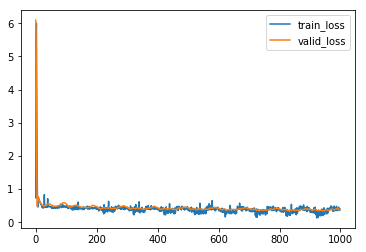

In [5]:
import matplotlib.pyplot as mplot

mplot.plot(train_loss, label='train_loss')
mplot.plot(valid_loss, label='valid_loss')
mplot.legend()
mplot.show()

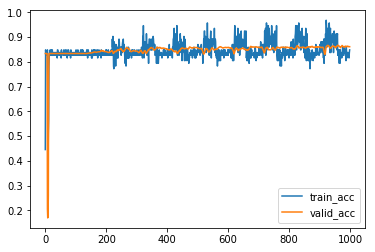

In [6]:
# import matplotlib.pyplot as mplot

mplot.plot(train_acc, label='train_acc')
mplot.plot(valid_acc, label='valid_acc')
mplot.legend()
mplot.show()